# Gradient Descent Implementations for Linear Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
import os
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
seaborn.set(style = 'whitegrid', font_scale = 1.5)
# current working directory
print(os.getcwd())
# change directory
data_path = '/content/drive/MyDrive/Colab Notebooks/codebasics_DL'
os.chdir(data_path)
# print directory files
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content
/content/drive/MyDrive/Colab Notebooks/codebasics_DL/WA_Fn-UseC_-Telco-Customer-Churn.csv
/content/drive/MyDrive/Colab Notebooks/codebasics_DL/homeprices_banglore.csv
/content/drive/MyDrive/Colab Notebooks/codebasics_DL/insurance_data.csv
/content/drive/MyDrive/Colab Notebooks/codebasics_DL/homeprices.csv


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codebasics_DL/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


## Data Preprocessing

In [4]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df.drop('price', axis = 'columns'))
y_scaled = scaler_y.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [5]:
print(X_scaled[:5])
print('-' * 30)
print(y_scaled[:5])

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]]
------------------------------
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]]


Reshape price into 1D array,

In [6]:
y_scaled.reshape(20, )

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
# Testing Cell
print(np.ones(2))

[1. 1.]


**Price = w1 * area + w2 * bedrooms + bias** 

## 1. Batch Gradient Descent

In [8]:
def batch_gd(X, y_true, epochs, learning_rate=0.01):
    number_of_features  = X.shape[1]
    # initialize weights and bias
    W = np.ones(shape = (number_of_features))
    b = 0
    total_samples = len(X[0])

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(W, X.T) + b

        # derivatives
        dW = -(2/total_samples) * np.dot(X.T, (y_true - y_predicted))
        db = -(2/total_samples) * np.sum(y_true - y_predicted)
        # Update Rule
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        cost = np.mean(np.square(y_true - y_predicted)) # MSE (mean squared error)
        
        if i%10 ==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return W, b, cost, cost_list, epoch_list

In [9]:
# Testing Cell
W, b, cost, cost_list, epoch_list = batch_gd(X_scaled, y_scaled.reshape(y_scaled.shape[0], ), epochs=500)
print(f"W_batch: {W}, b_batch: {b}' cost_batch: {cost}")

W_batch: [0.75550442 0.41573953], b_batch: -0.11682769564715854' cost_batch: 0.0034268126227234427


In [10]:
def plot_learning_curve(epochs, cost):
    # Learning Curve
    fig = plt.figure(figsize = (8, 4))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Cost Function')
    plt.plot(epochs, cost)

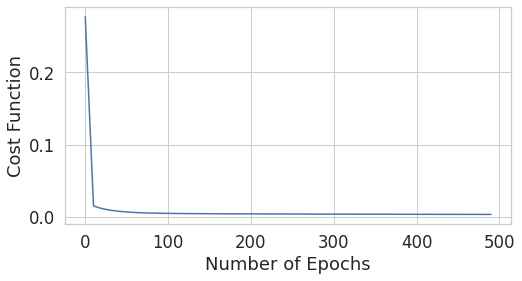

In [11]:
plot_learning_curve(epoch_list, cost_list)

In [12]:
def predict(area,bedrooms, w, b):
    scaled_X = scaler_X.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return scaler_y.inverse_transform([[scaled_price]])[0][0]

In [13]:
import warnings
warnings.filterwarnings('ignore')
## Testing prediction function
print(predict(2600, 4, W, b))
print(predict(1000, 2, W, b))
print(predict(1500, 3, W, b))

121.6279485426776
37.293476976103996
68.9097028119826


## 2. Stochastic Gradient Descent

stochastic gradinet descent picks up a random sample to calculate error and backpropagate to update weights.

In [14]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

1

In [15]:
def stochastic_gd(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    # initialize weights and bias
    W = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # Get a random index
        random_index = np.random.randint(0, total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        # y_predicted
        y_predicted = np.dot(sample_X.T, W) + b

        # Derivatives
        dW = -(2/total_samples) * np.dot(sample_X.T, (sample_y - y_predicted))
        db = -(2/total_samples) * (sample_y - y_predicted)

        # Update Rule
        W = W - learning_rate * dW
        b = b - learning_rate * db

        cost = np.square(sample_y - y_predicted)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return W, b, cost, cost_list, epoch_list

In [16]:
W_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gd(X_scaled, y_scaled.reshape(y_scaled.shape[0], ),
                                                                                     epochs = 10000) 
print(f"W_sgd: {W_sgd}, b_sgd: {b_sgd}, cost_sgd: {cost_sgd}")

W_sgd: [0.72268538 0.70734714], b_sgd: -0.26096938187352015, cost_sgd: 0.0003462727210219111


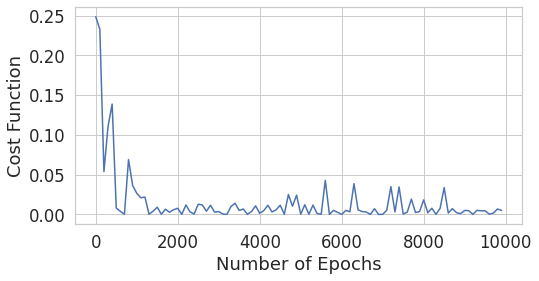

In [17]:
plot_learning_curve(epoch_list_sgd, cost_list_sgd)

In [18]:
def predict(area,bedrooms, w, b):
    scaled_X = scaler_X.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return scaler_y.inverse_transform([[scaled_price]])[0][0]

In [19]:
import warnings
warnings.filterwarnings('ignore')
## Testing prediction function
print(predict(2600, 4, W_sgd, b_sgd))
print(predict(1000, 2, W_sgd, b_sgd))
print(predict(1500, 3, W_sgd, b_sgd))

128.94408219610926
27.37054951323815
68.0646407170376


## 3. Mini_Batch Gradient Descent

In [20]:
# Get random indices
np.random.permutation(20)

array([13,  2,  0, 16,  4,  1,  7, 18,  5, 10, 19,  3, 12, 15, 14, 17,  6,
        9, 11,  8])

In [21]:
def mini_batch_gd(X, y_true, epochs, batch_size=5, learning_rate=0.01):
    # No. of features
    n_features = X.shape[1]
    # Initialize weights and biases
    W = np.ones(n_features)
    b = 0
    
    total_samples = X.shape[0]
    num_batches = int(total_samples / batch_size)

    cost_list = []
    epoch_list = []

    for i in range(epochs): 
        random_indices = np.random.permutation(total_samples)
        X_random = X[random_indices]
        y_random = y_true[random_indices]

        for j in range(0, total_samples, batch_size):
            X_batch = X_random[j: j+batch_size]
            y_batch = y_random[j: j+batch_size]
            # y_predicted
            y_predicted = np.dot(W, X_batch.T) + b

            # Derivatives
            dW = -(2/len(X_batch)) * np.dot(X_batch.T, (y_batch - y_predicted))
            db = -(2/len(X_batch)) * np.sum((y_batch - y_predicted))

            # Update Rule
            W = W - learning_rate * dW 
            b = b - learning_rate * db
            # batch cost
            cost = np.mean(np.square(y_batch - y_predicted)) # MSE (mean squared error)
        
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return W, b, cost, cost_list, epoch_list

In [22]:
W_mini, b_mini, cost_mini, cost_list_mini, epoch_list_mini = mini_batch_gd(X_scaled, y_scaled.reshape(y_scaled.shape[0], ),
                                                                                     epochs=150) 
print(f"W_mini: {W_mini}, b_mini: {b_mini}, cost_mini: {cost_mini}")

W_mini: [0.69298854 0.65683341], b_mini: -0.21565487343543363, cost_mini: 0.01093327864956863


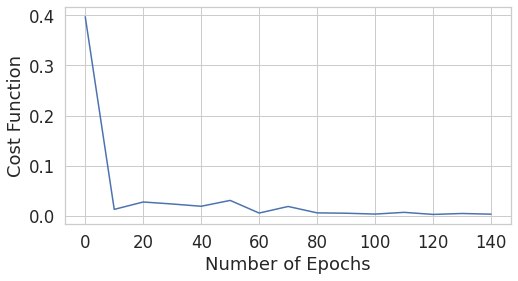

In [23]:
plot_learning_curve(epoch_list_mini, cost_list_mini)

In [24]:
def predict(area,bedrooms, w, b):
    scaled_X = scaler_X.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return scaler_y.inverse_transform([[scaled_price]])[0][0]

In [25]:
import warnings
warnings.filterwarnings('ignore')
## Testing prediction function
print(predict(2600, 4, W_mini, b_mini))
print(predict(1000, 2, W_mini, b_mini))
print(predict(1500, 3, W_mini, b_mini))

127.45863456858669
31.506681780140696
69.80471482421432
